# Exploratory Data Analysis - Retail ( Sample Superstore )

#### Import libraries 

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# Importing the dataset
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#checking the data types
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

All the data types are correct and no change required

In [4]:
#checking the missing values if any
df.shape

(9994, 13)

In [5]:
#checking null variables
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


This function only shows the continuous variables. And no missing values in the datasets.

In [7]:
# check unique value in dataset
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

#### Data visualizing

In [8]:
#Analysing segment of people buying from superstore
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

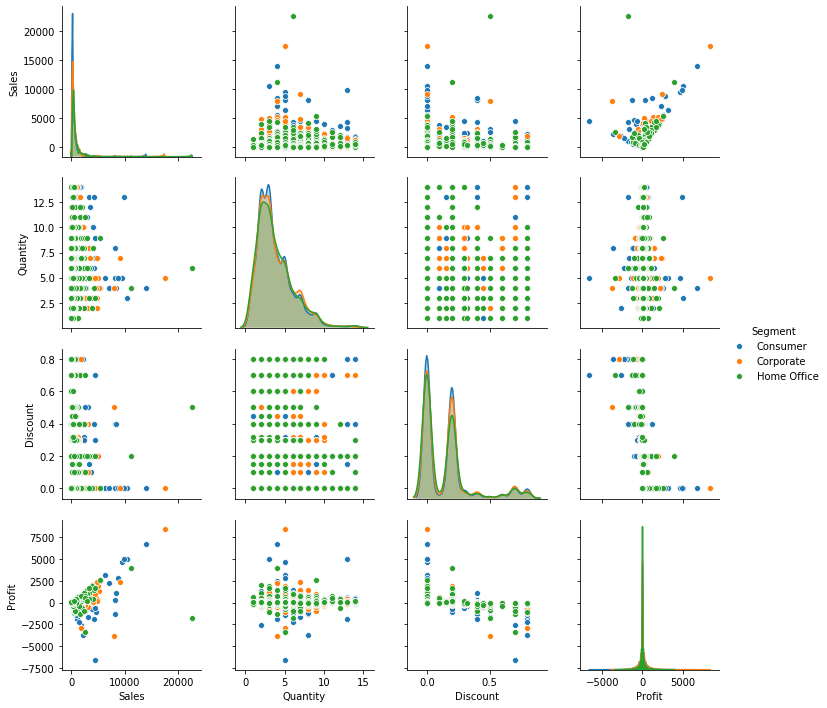

In [9]:
df = df.drop(['Postal Code'],axis = 1)   #dropping the Postal code column
sns.pairplot(df,hue = 'Segment')

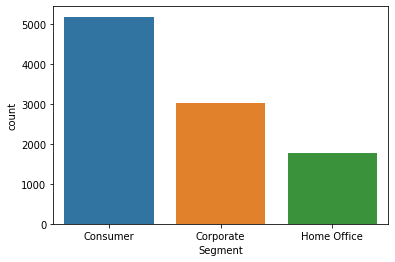

In [10]:
sns.countplot(x=df['Segment'])

In [11]:
#Analysing ship mode for the superstore
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

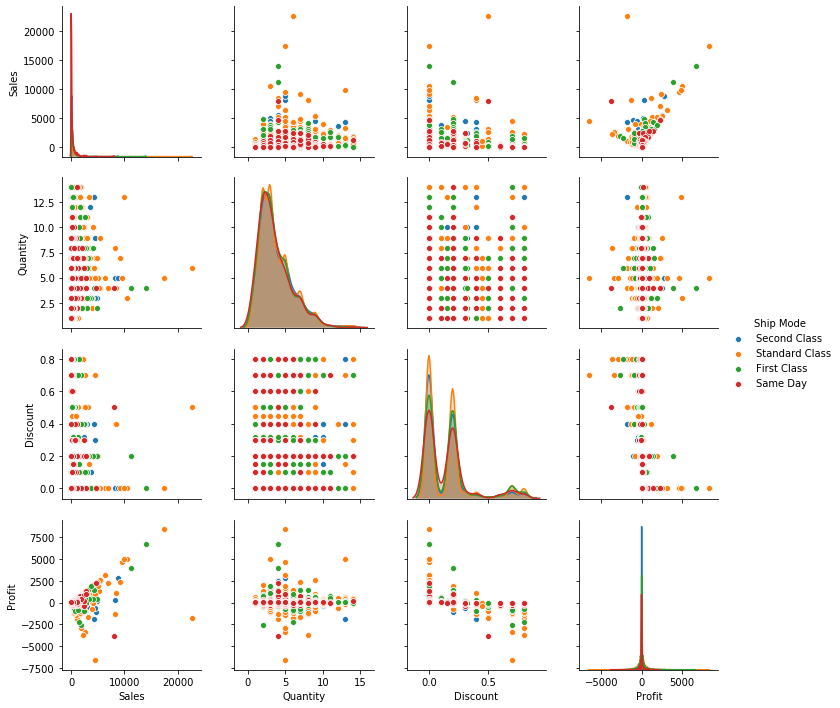

In [12]:
sns.pairplot(df, hue = 'Ship Mode')

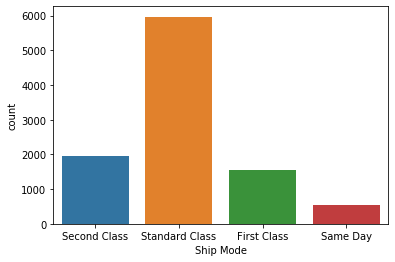

In [13]:
sns.countplot(x=df['Ship Mode'])

In [14]:
#Analysing category item in the superstore
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

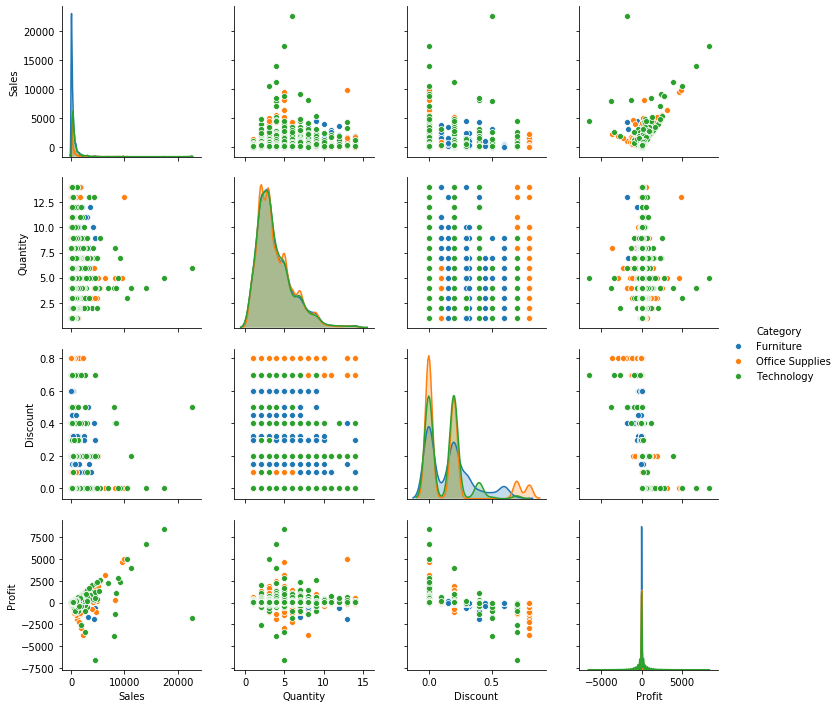

In [15]:
sns.pairplot(df, hue='Category')

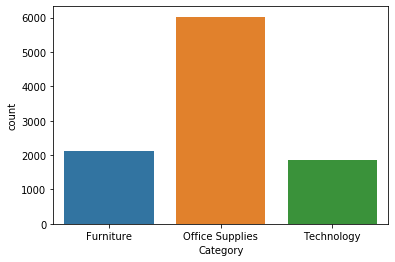

In [16]:
sns.countplot(x=df['Category'])

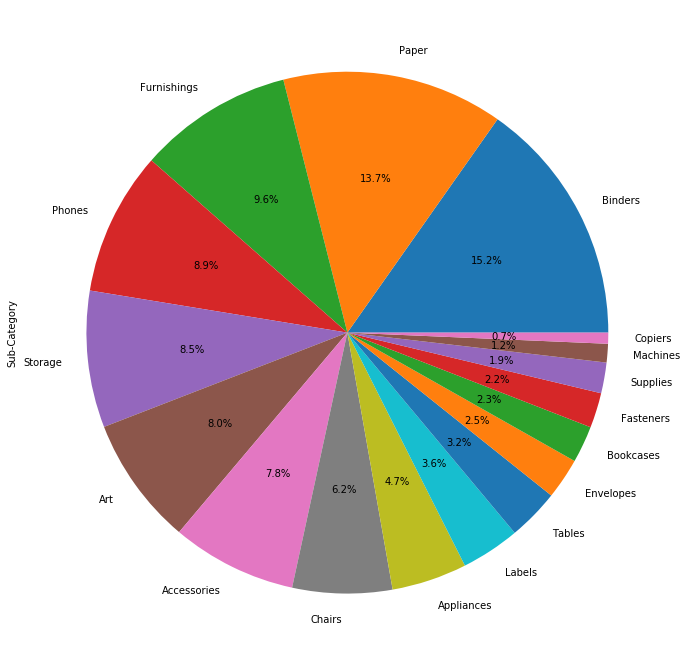

In [17]:
#Analysing category item in the superstore
plt.figure(figsize=(13,12))
(df['Sub-Category'].value_counts()).plot(kind='pie',autopct = '%1.1f%%')
plt.show()

Maximum are from Binders, Paper, furnishings, Phones, storage, art, accessories and minimum from copiers, machines, suppliers

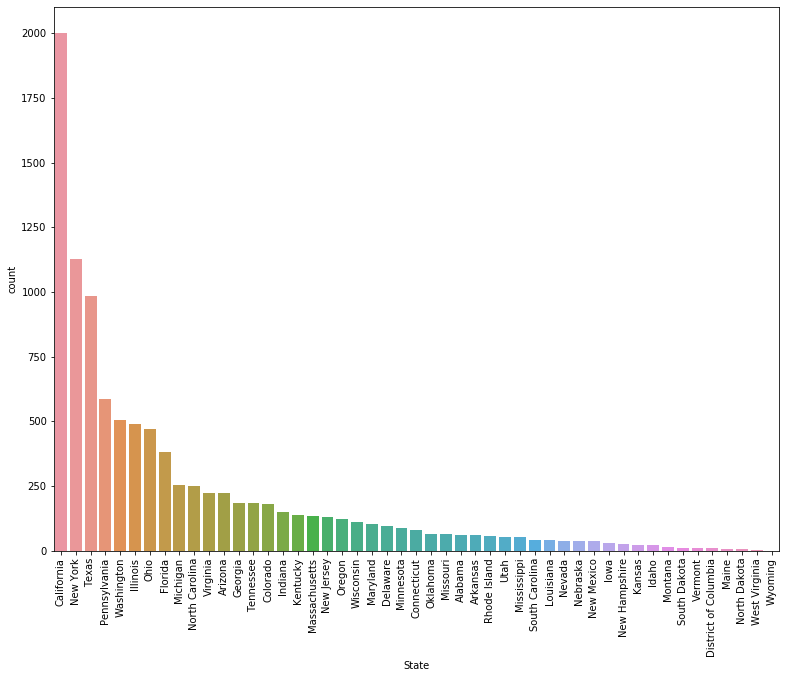

In [18]:
plt.figure(figsize=(13,10))           # bar plot
sns.countplot(x='State',data=df,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Highest number of buyers are from California and New York 

lowest number of buyers are from Wyoming, West Virginia, Maine and North Dakota

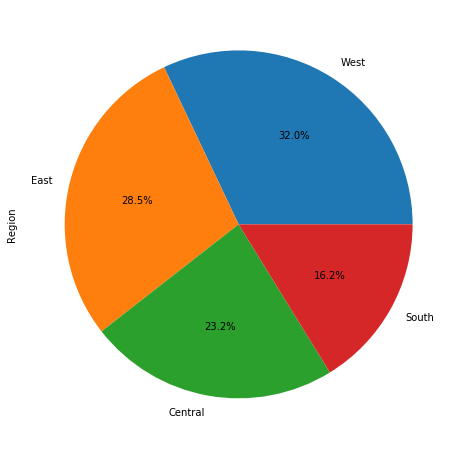

In [19]:
plt.figure(figsize=(10,8))   #pie chart 
df['Region'].value_counts().plot(kind='pie',autopct = '%1.1f%%')
plt.show()

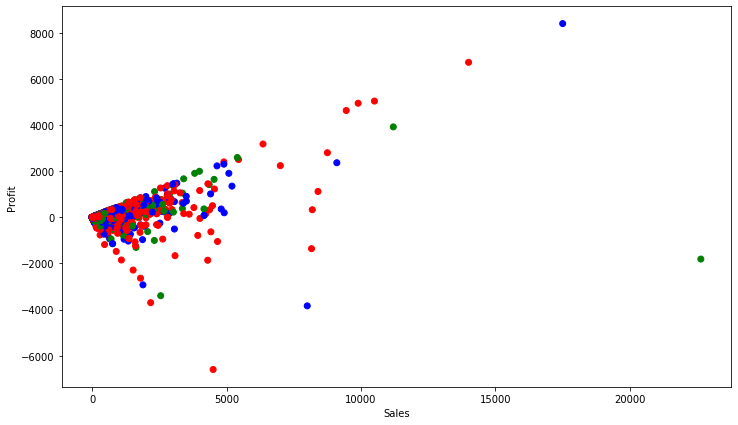

In [20]:
fig, ax = plt.subplots(figsize = (12,7))
color ={ 'Consumer':'red', 'Corporate':'blue', 'Home Office':'green'}
ax.scatter(df['Sales'], df['Profit'], c=df['Segment'].apply(lambda x: color[x]))
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

from the above plot, we can say that there is more profit in consumer segment.

In [21]:
#pivot table for discount
df.pivot_table(values='Profit', index='Segment', columns='Discount', aggfunc='median')

Discount,0.0,0.1,0.15,0.2,0.3,0.32,0.4,0.45,0.5,0.6,0.7,0.8
Segment,,,,,,,,,,,,
Consumer,16.1240,62.0390,5.12940,6.0433,-26.0562,-30.0980,-47.21360,-135.68145,-175.2600,-14.1323,-8.7276,-13.7175
Corporate,16.2688,46.7908,26.27735,6.7054,-28.2240,-59.0606,-87.27495,-255.58750,-120.5130,-10.4196,-8.9796,-16.3800
Home Office,15.4546,37.2300,16.79860,7.2576,-18.2040,-57.3234,-49.71900,-175.14690,-237.8425,-14.2290,-9.7608,-14.0328


From the above pivot table, we can say that when discount is more than 30%, the superstore is going on loss.

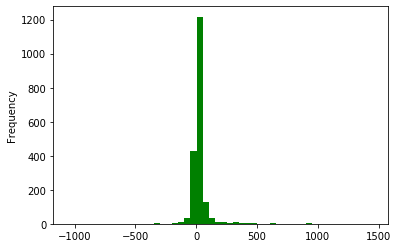

In [22]:
t_df = df.loc[(df['Segment']=='Consumer') & (df['Discount']==0.2)]      # bar plot for dicount = 0.2 
t_df['Profit'].plot.hist(bins=50, color='g')

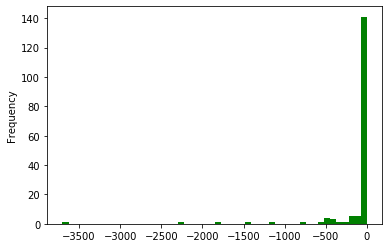

In [23]:
t_df = df.loc[(df['Segment']=='Consumer') & (df['Discount']==0.8)]      # bar plot for dicount = 0.8 
t_df['Profit'].plot.hist(bins=50, color='g')

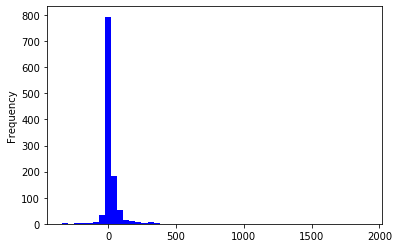

In [24]:
t_df = df.loc[(df['Segment']=='Corporate') & (df['Discount']==0.2)]
t_df['Profit'].plot.hist(bins=50, color='b')

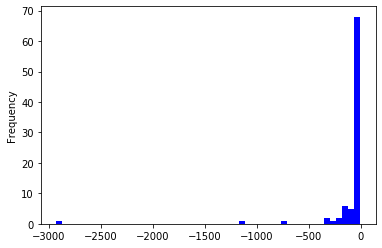

In [25]:
t_df = df.loc[(df['Segment']=='Corporate') & (df['Discount']==0.8)]
t_df['Profit'].plot.hist(bins=50, color='b')

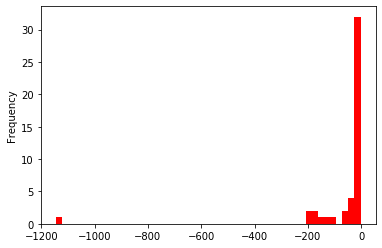

In [26]:
t_df = df.loc[(df['Segment']=='Home Office') & (df['Discount']==0.8)]
t_df['Profit'].plot.hist(bins=50, color='r')

For all the segments, when superstore is offering discount more the 50% like we have taken discount=80%, superstore going on loss

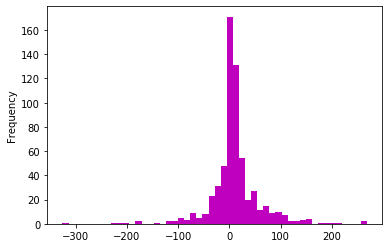

In [27]:
t_df = df.loc[(df['Category']=='Furniture') & (df['Discount']==0.2)]
t_df['Profit'].plot.hist(bins=50, color='m')

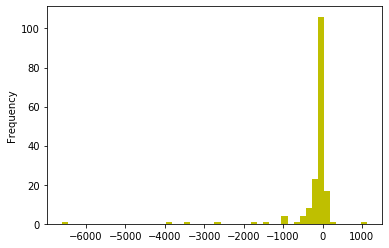

In [28]:
t_df = df.loc[(df['Category']=='Technology') & (df['Discount']>=0.3)]
t_df['Profit'].plot.hist(bins=50, color='y')

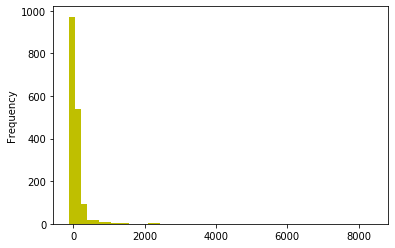

In [29]:
t_df = df.loc[(df['Category']=='Technology') & (df['Discount']<=0.3)]
t_df['Profit'].plot.hist(bins=50, color='y')

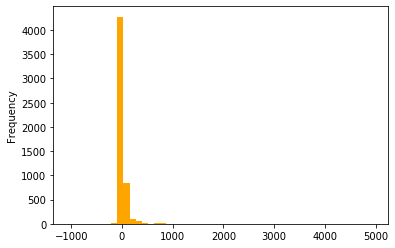

In [30]:
t_df = df.loc[(df['Category']=='Office Supplies') & (df['Discount']<=0.3)]
t_df['Profit'].plot.hist(bins=50, color='orange')

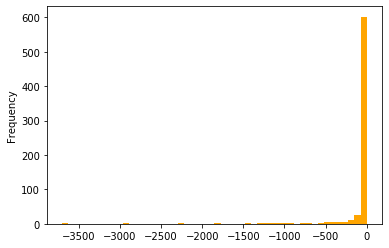

In [31]:
t_df = df.loc[(df['Category']=='Office Supplies') & (df['Discount']>=0.3)]
t_df['Profit'].plot.hist(bins=50, color='orange')

From the above plots. we can conclude that (for all the Category: Furniture, Technology, Office Supplies)
1. when discount <=30% in items, Sales is going into profit
2. when discount >=30% in items, Sales is going into a huge loss

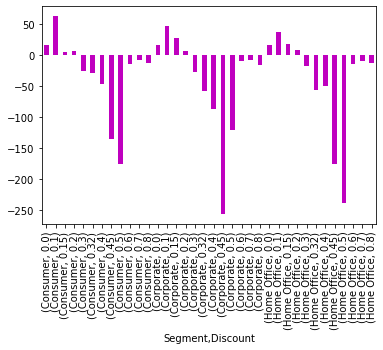

In [32]:
tdf = df.groupby(['Segment', 'Discount']).Profit.median()
tdf.plot(kind='bar', color='m', stacked= True)

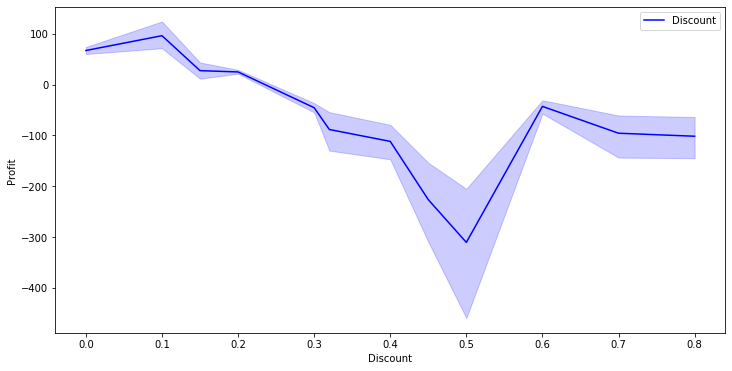

In [33]:
plt.figure(figsize = (12,6))
sns.lineplot('Discount', 'Profit', data = df, color='b',label= 'Discount')            # discount line plot
plt.legend()

# Thank You !